# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import hb_write
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
#random_state Любое целое число - будет работать как seed
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42), #Создает два концентрических круга (класса)
    make_moons(noise=0.2, random_state=42),#Создает два полумесяца, вложенных друг в друга
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

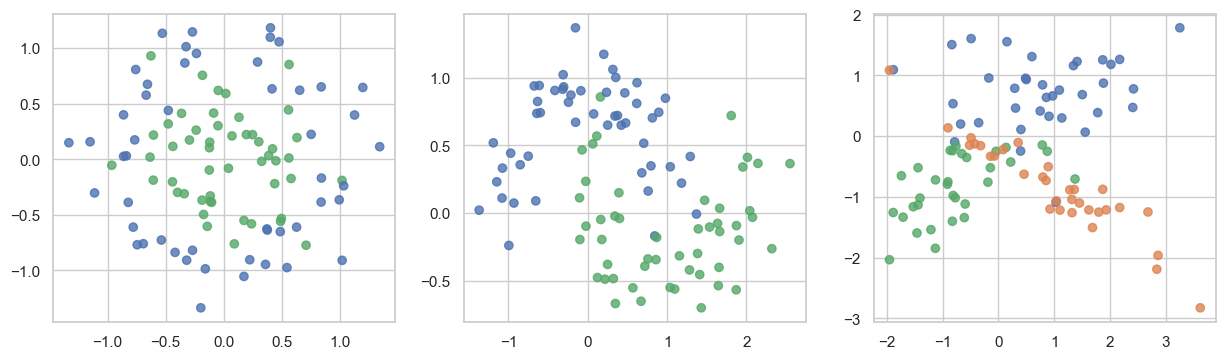

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])#получает предсказания класса для каждой точки
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)#заливает цветом области с одинаковыми предсказаниями

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

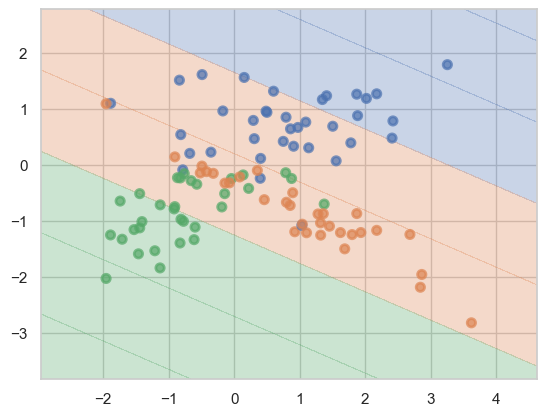

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

=== концентрические круги ===
Accuracy на обучающей выборке: 1.000
Accuracy на тестовой выборке:  0.667
Разница (переобучение): 0.333
Глубина дерева: 2

=== полумесяцы ===
Accuracy на обучающей выборке: 1.000
Accuracy на тестовой выборке:  0.856
Разница (переобучение): 0.144
Глубина дерева: 2

=== Классификация (3 класса) ===
Accuracy на обучающей выборке: 1.000
Accuracy на тестовой выборке:  0.644
Разница (переобучение): 0.356
Глубина дерева: 4



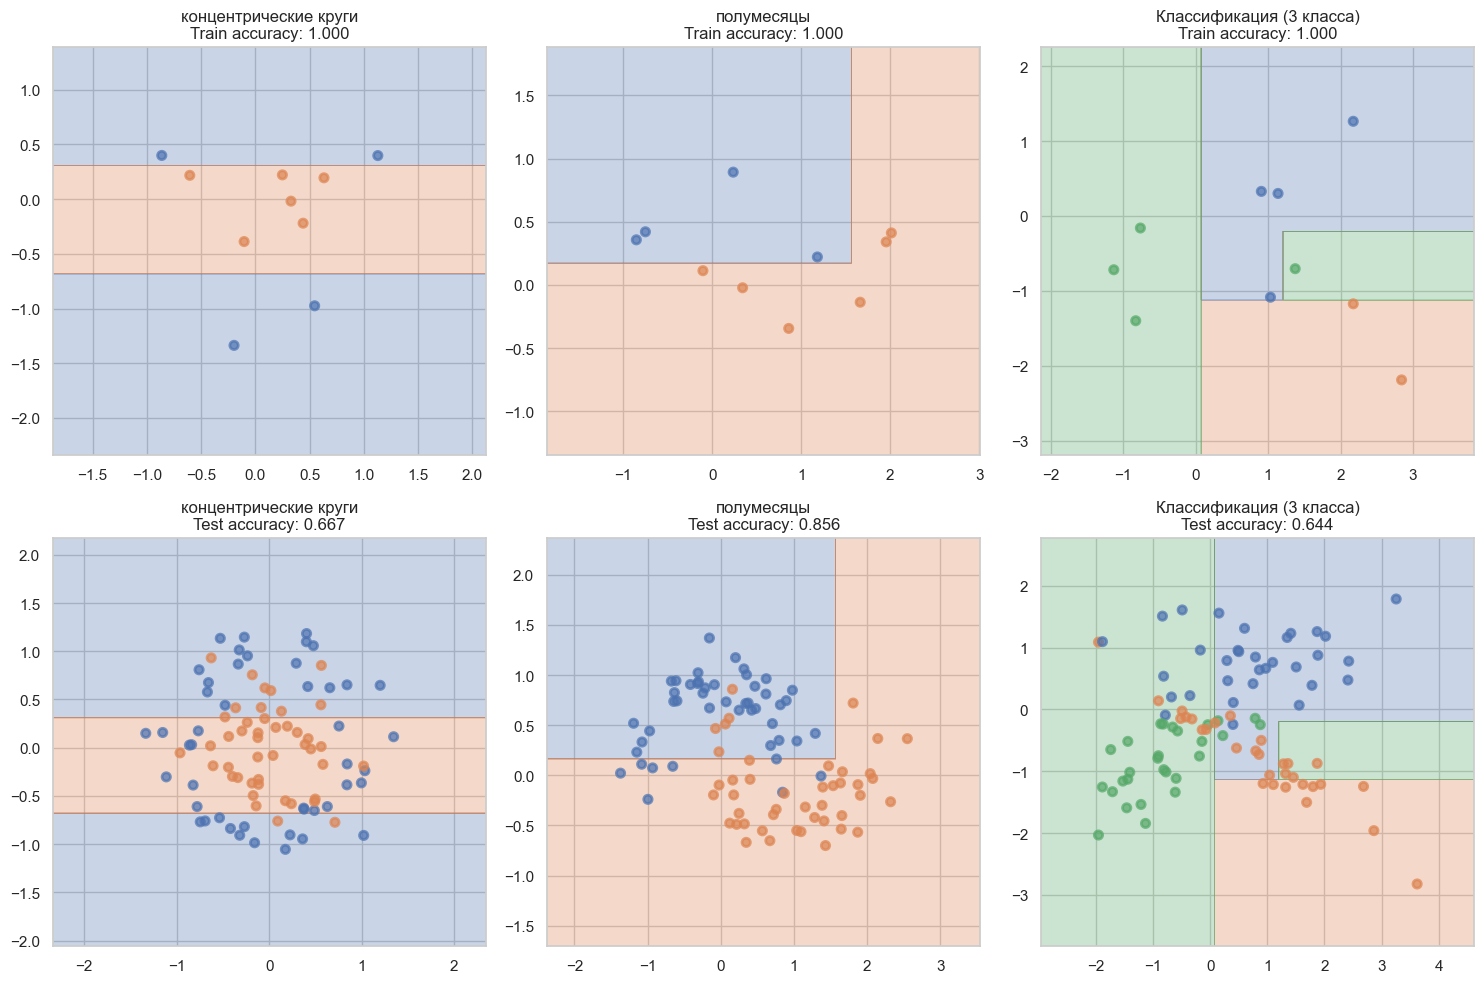

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns


dataset_names = ['концентрические круги', 'полумесяцы', 'Классификация (3 класса)']
plt.figure(figsize=(15, 10))

for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
    X, y = dataset
    #30% на тест, 70% на обучение
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    tree = DecisionTreeClassifier(random_state=42) #параметры по умолчанию
    tree.fit(X_train, y_train)

    # Предсказания и accuracy
    train_accuracy = accuracy_score(y_train, tree.predict(X_train))
    test_accuracy = accuracy_score(y_test, tree.predict(X_test))

    plt.subplot(2, 3, i + 1)
    plot_surface(tree, X_train, y_train)
    plt.title(f'{name}\nTrain accuracy: {train_accuracy:.3f}')

    plt.subplot(2, 3, i + 4)
    plot_surface(tree, X_test, y_test)
    plt.title(f'{name}\nTest accuracy: {test_accuracy:.3f}')

    # Вывод результатов
    print(f'=== {name}')
    print(f'Accuracy на обучающей выборке: {train_accuracy:.3f}')
    print(f'Accuracy на тестовой выборке:  {test_accuracy:.3f}')
    print(f'Разница (переобучение): {train_accuracy - test_accuracy:.3f}')
    print(f'Глубина дерева: {tree.get_depth()}')
    print()

plt.tight_layout()
plt.show()

__Ответ:__ Деревья сильно переобучились, так как мы строили дреево с признакими по умолчанию, из-за чего на обучающей выборке дерево подстроилось под входные данные и шумы в них и дало 100% accuracy. Можно сказать что дерево пееробученно? исходя из большой разности между Accuracy на обучающей выборке и на тестовой, а также по форме разделяющих поверхностей, они имеют сложную, неровную форму, что характерно для переобученных моделей.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


ДАТАСЕТ: Circles


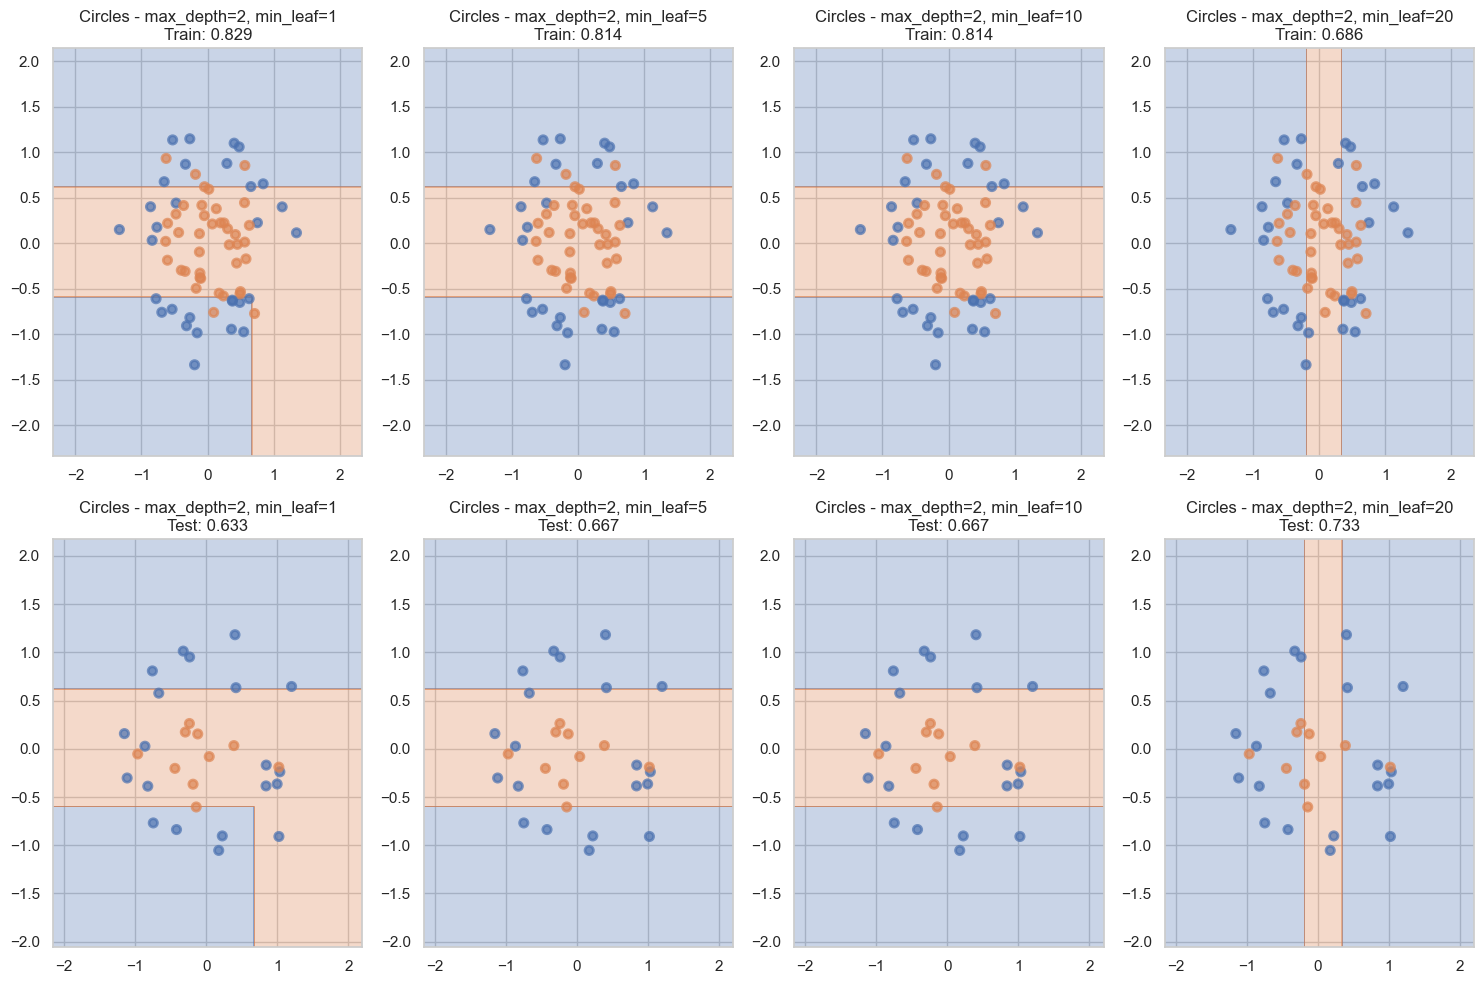


max_depth = 2:
  min_samples_leaf=1: train=0.829, test=0.633, diff=0.195
  min_samples_leaf=5: train=0.814, test=0.667, diff=0.148
  min_samples_leaf=10: train=0.814, test=0.667, diff=0.148
  min_samples_leaf=20: train=0.686, test=0.733, diff=-0.048


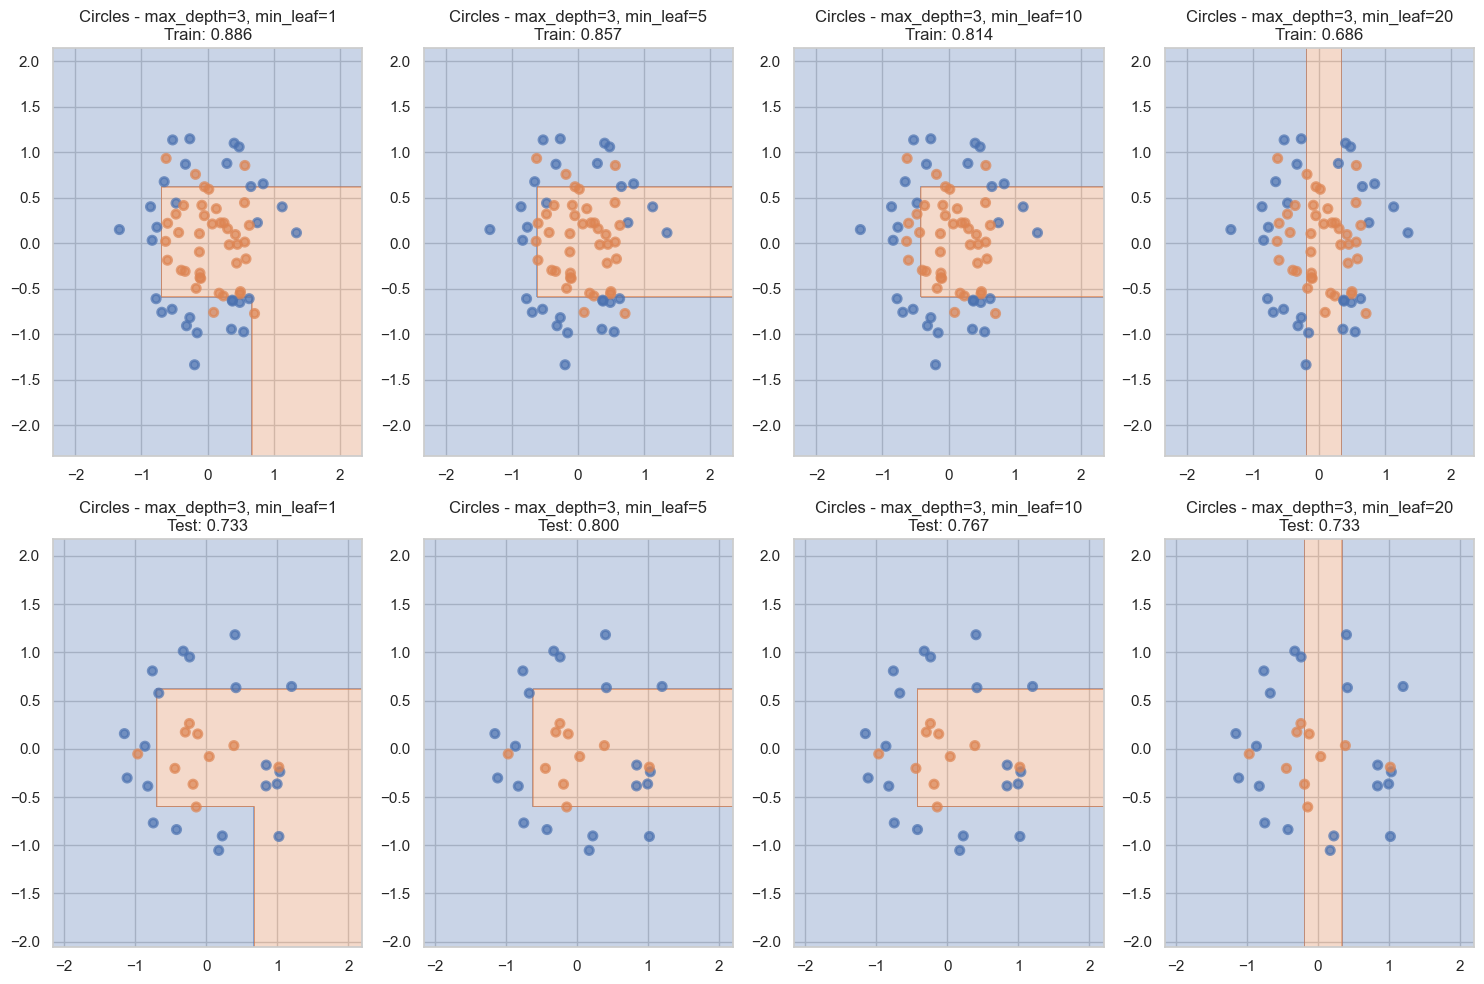


max_depth = 3:
  min_samples_leaf=1: train=0.886, test=0.733, diff=0.152
  min_samples_leaf=5: train=0.857, test=0.800, diff=0.057
  min_samples_leaf=10: train=0.814, test=0.767, diff=0.048
  min_samples_leaf=20: train=0.686, test=0.733, diff=-0.048


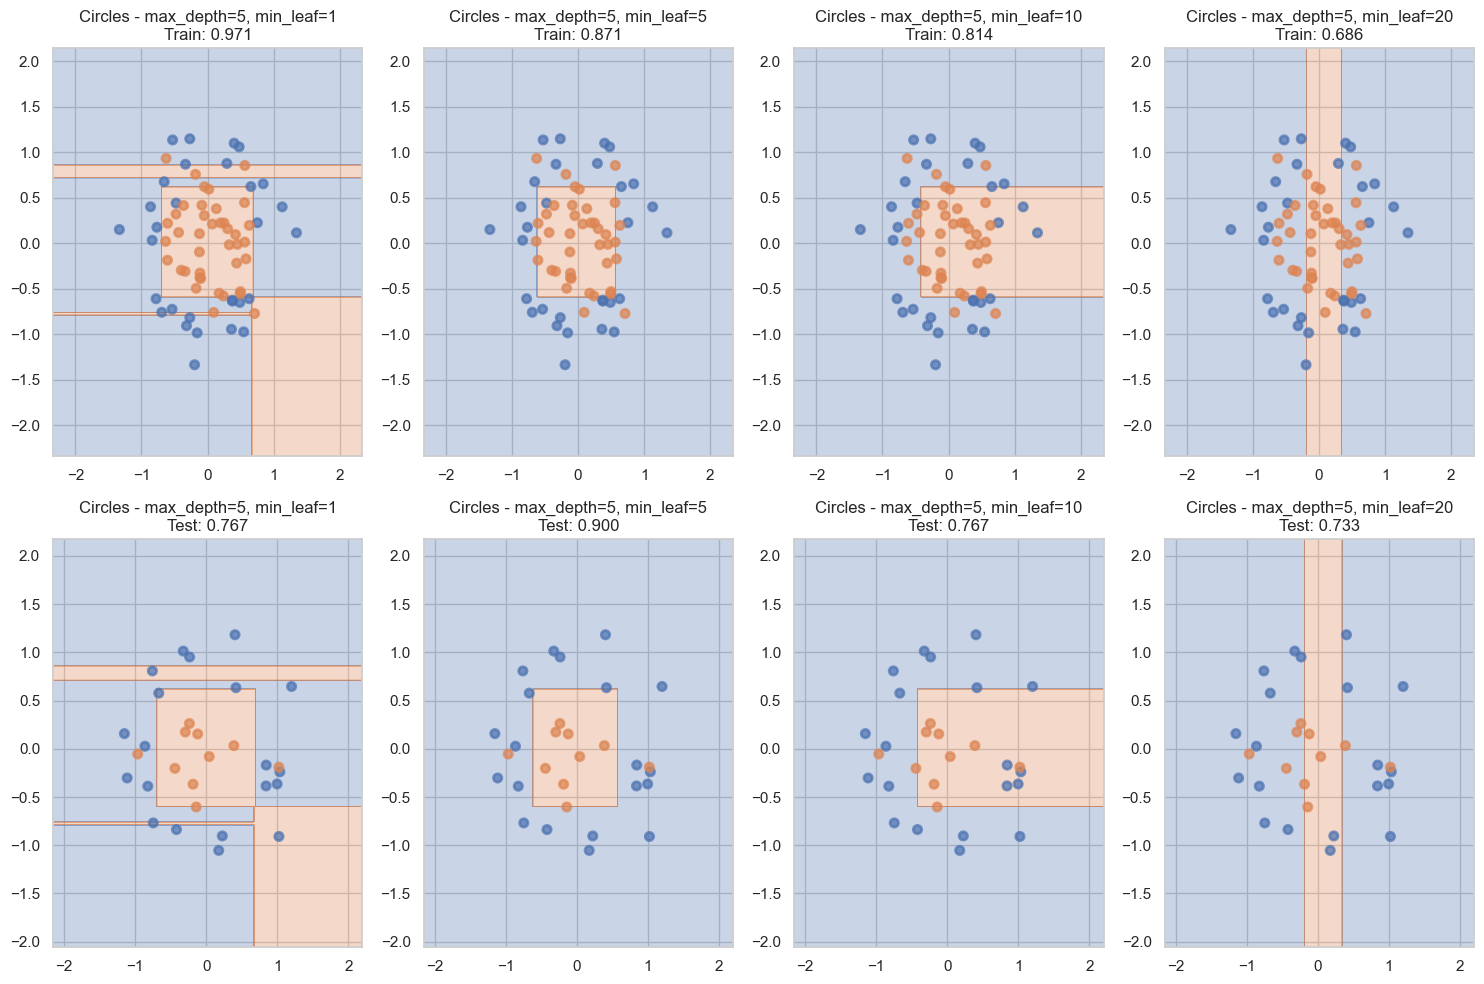


max_depth = 5:
  min_samples_leaf=1: train=0.971, test=0.767, diff=0.205
  min_samples_leaf=5: train=0.871, test=0.900, diff=-0.029
  min_samples_leaf=10: train=0.814, test=0.767, diff=0.048
  min_samples_leaf=20: train=0.686, test=0.733, diff=-0.048


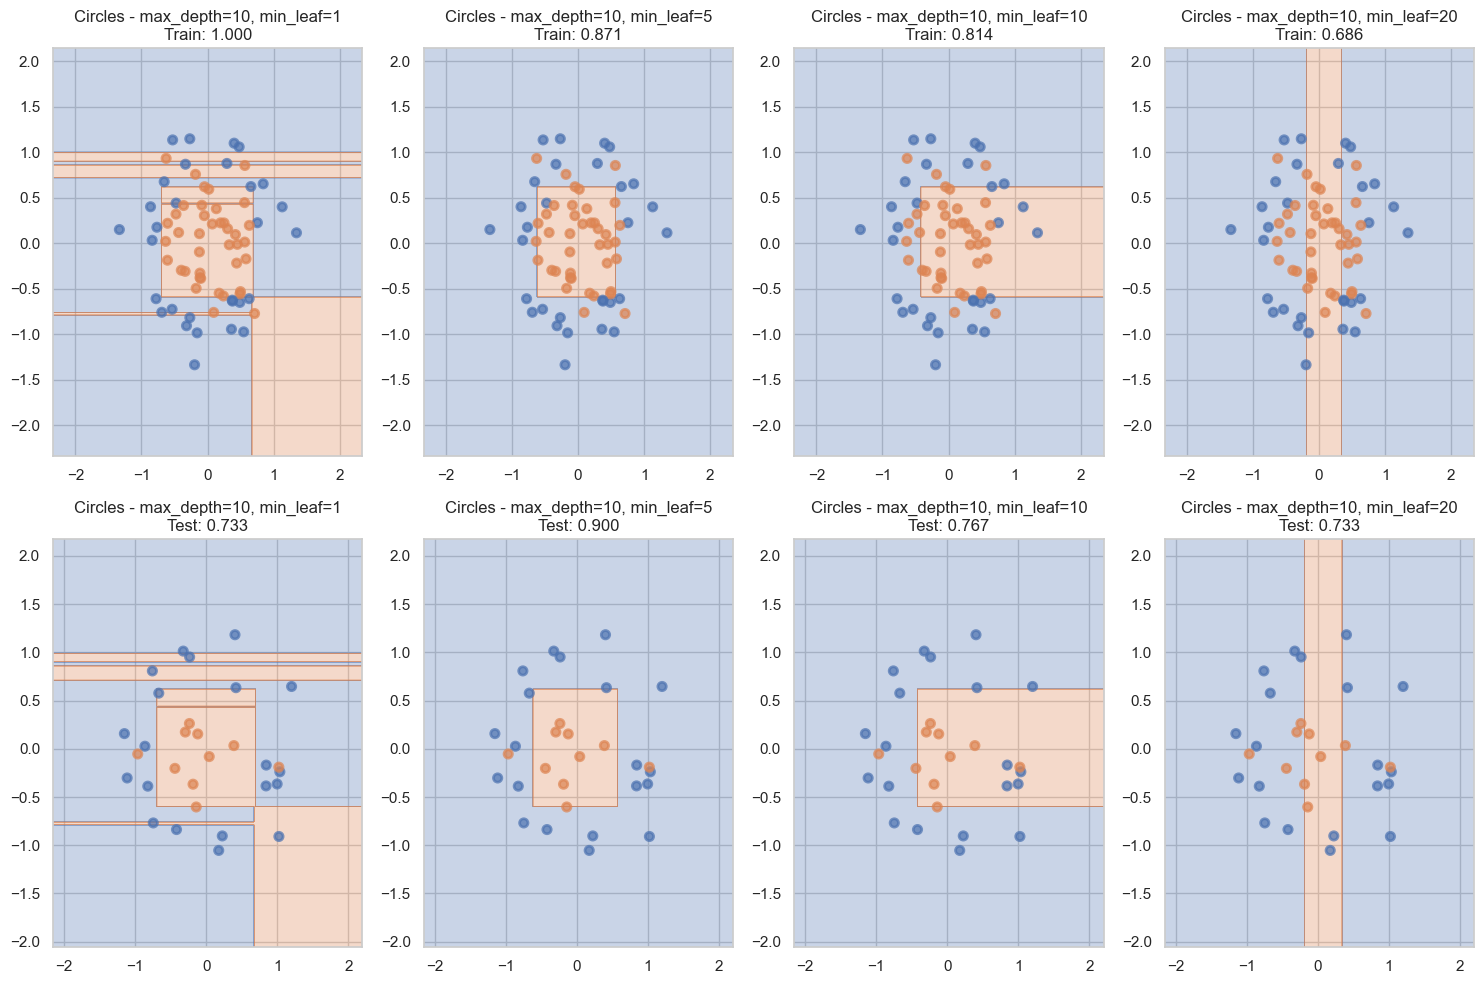


max_depth = 10:
  min_samples_leaf=1: train=1.000, test=0.733, diff=0.267
  min_samples_leaf=5: train=0.871, test=0.900, diff=-0.029
  min_samples_leaf=10: train=0.814, test=0.767, diff=0.048
  min_samples_leaf=20: train=0.686, test=0.733, diff=-0.048

Анализ лучших параметров для Circles:
Лучшие параметры: max_depth=5, min_samples_leaf=5
Лучшая test accuracy: 0.900

ДАТАСЕТ: Moons


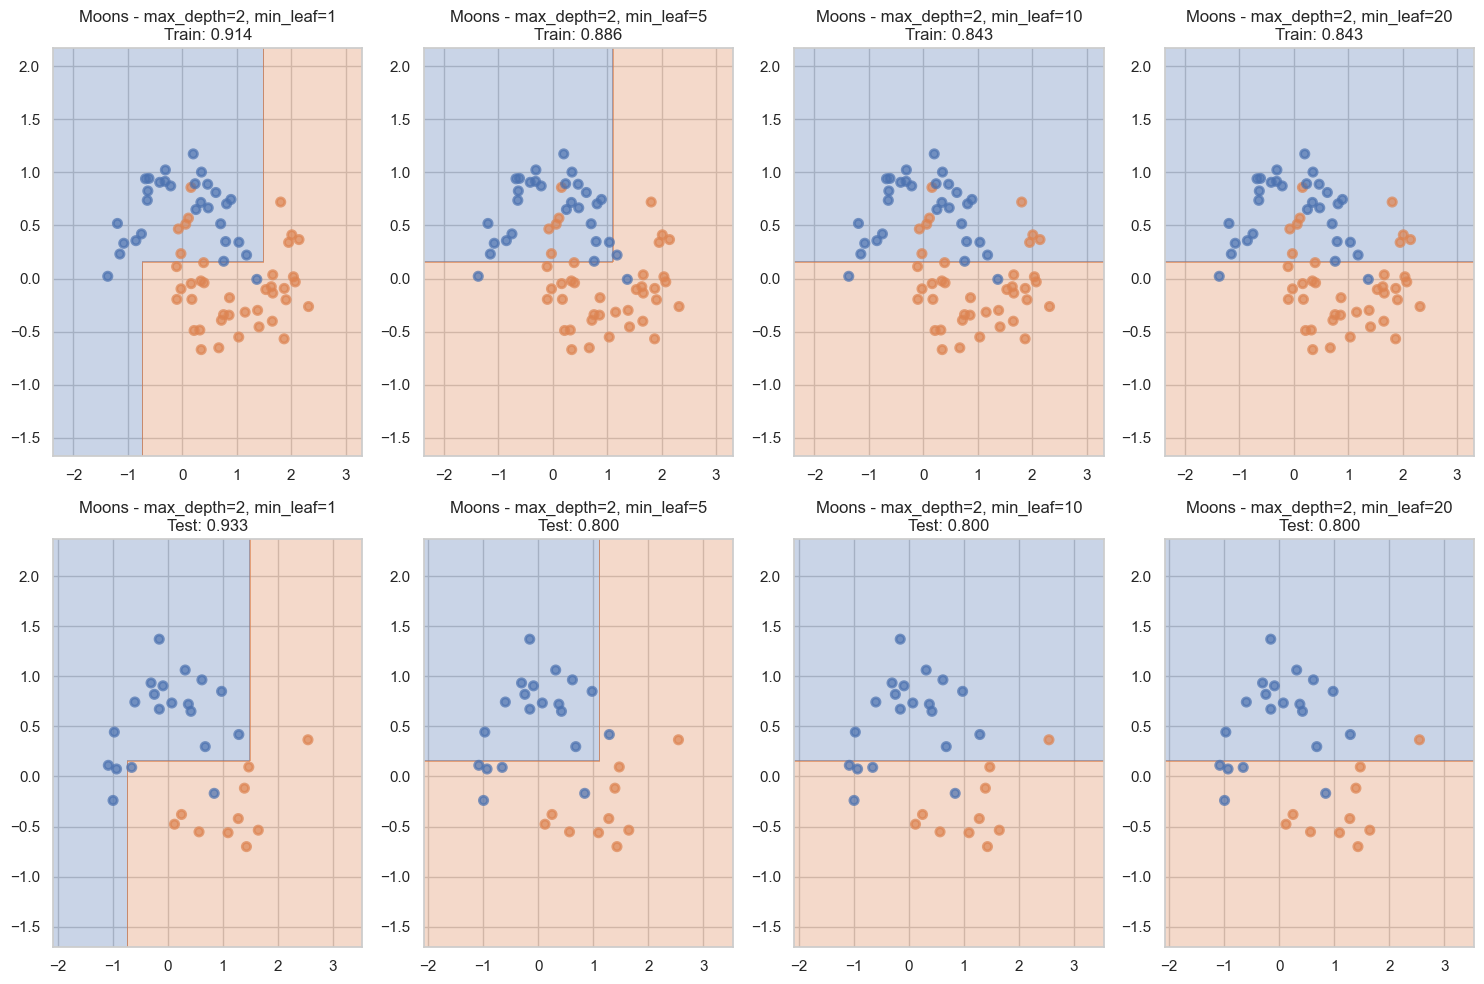


max_depth = 2:
  min_samples_leaf=1: train=0.914, test=0.933, diff=-0.019
  min_samples_leaf=5: train=0.886, test=0.800, diff=0.086
  min_samples_leaf=10: train=0.843, test=0.800, diff=0.043
  min_samples_leaf=20: train=0.843, test=0.800, diff=0.043


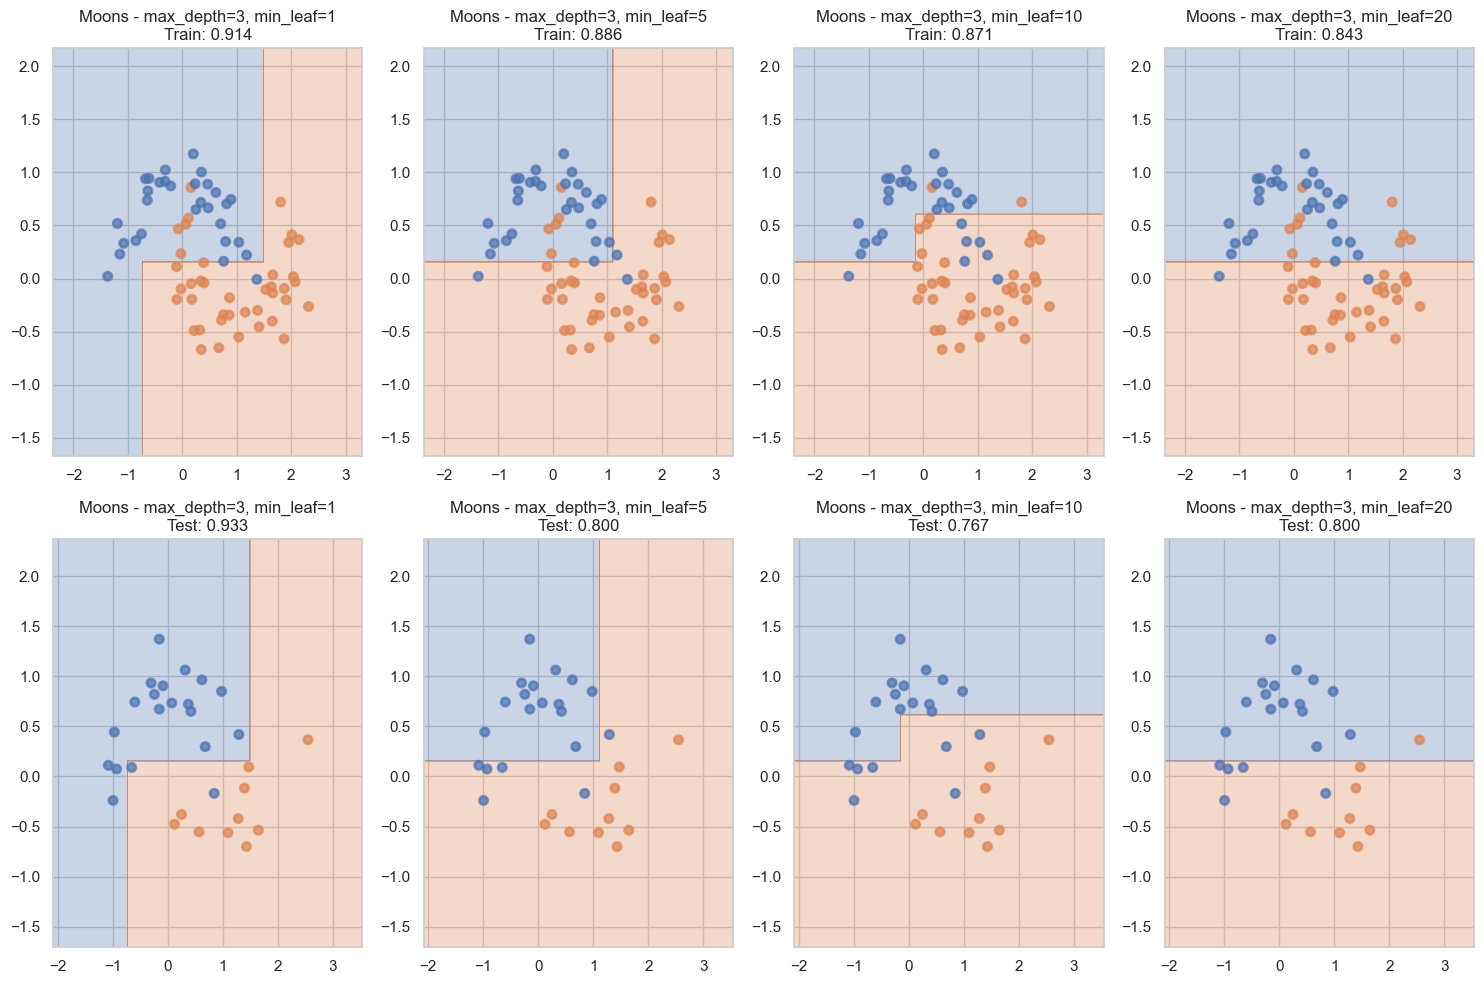


max_depth = 3:
  min_samples_leaf=1: train=0.914, test=0.933, diff=-0.019
  min_samples_leaf=5: train=0.886, test=0.800, diff=0.086
  min_samples_leaf=10: train=0.871, test=0.767, diff=0.105
  min_samples_leaf=20: train=0.843, test=0.800, diff=0.043


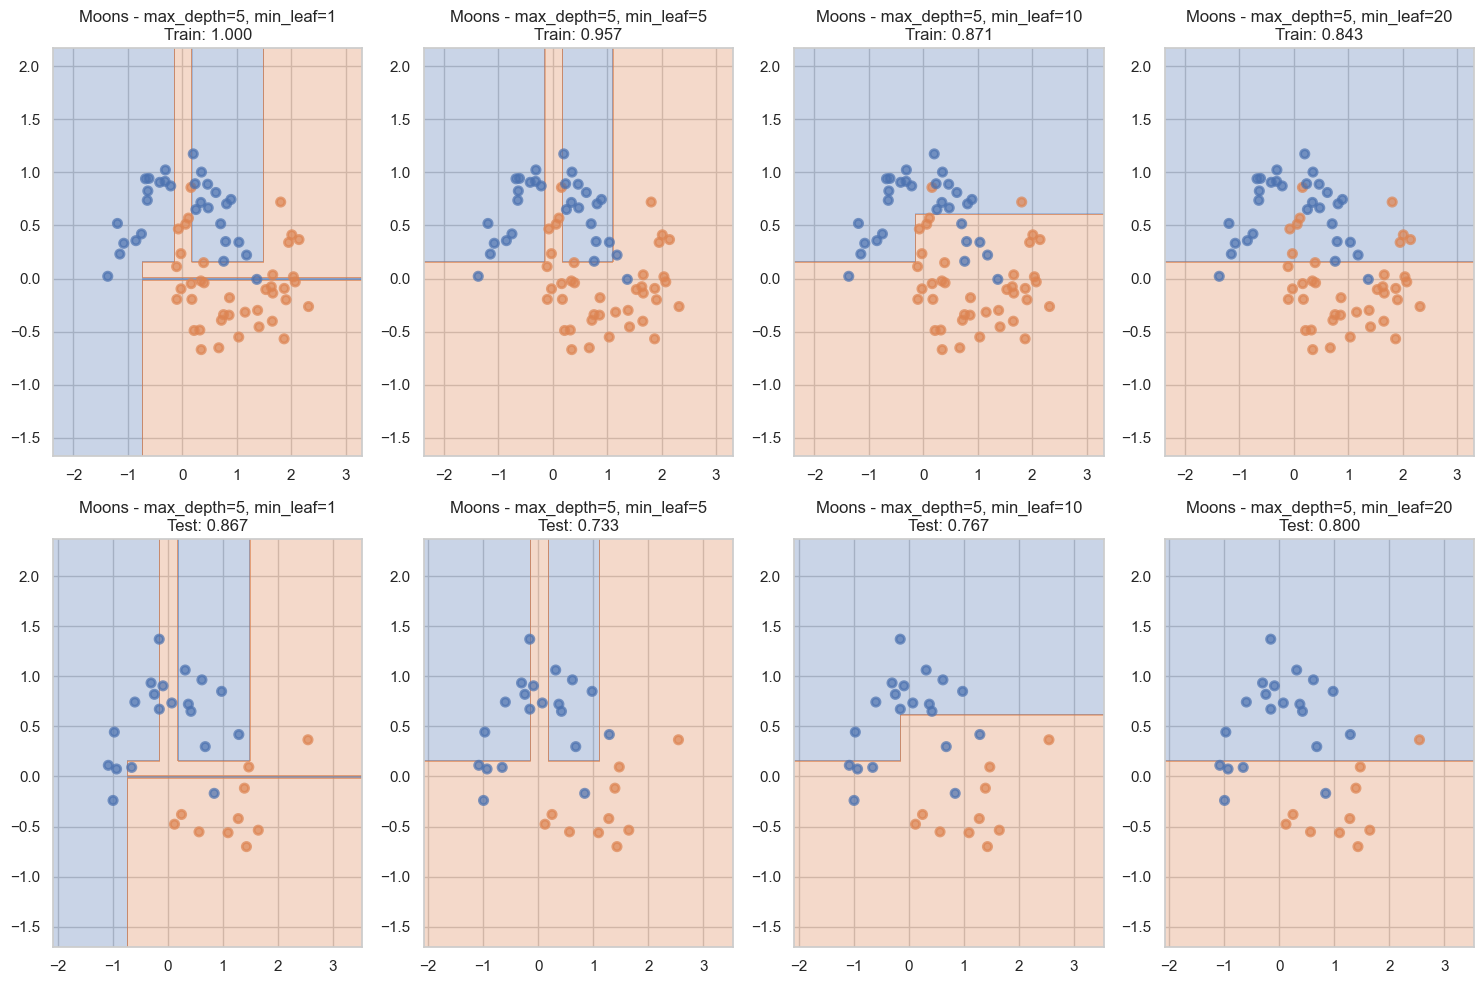


max_depth = 5:
  min_samples_leaf=1: train=1.000, test=0.867, diff=0.133
  min_samples_leaf=5: train=0.957, test=0.733, diff=0.224
  min_samples_leaf=10: train=0.871, test=0.767, diff=0.105
  min_samples_leaf=20: train=0.843, test=0.800, diff=0.043


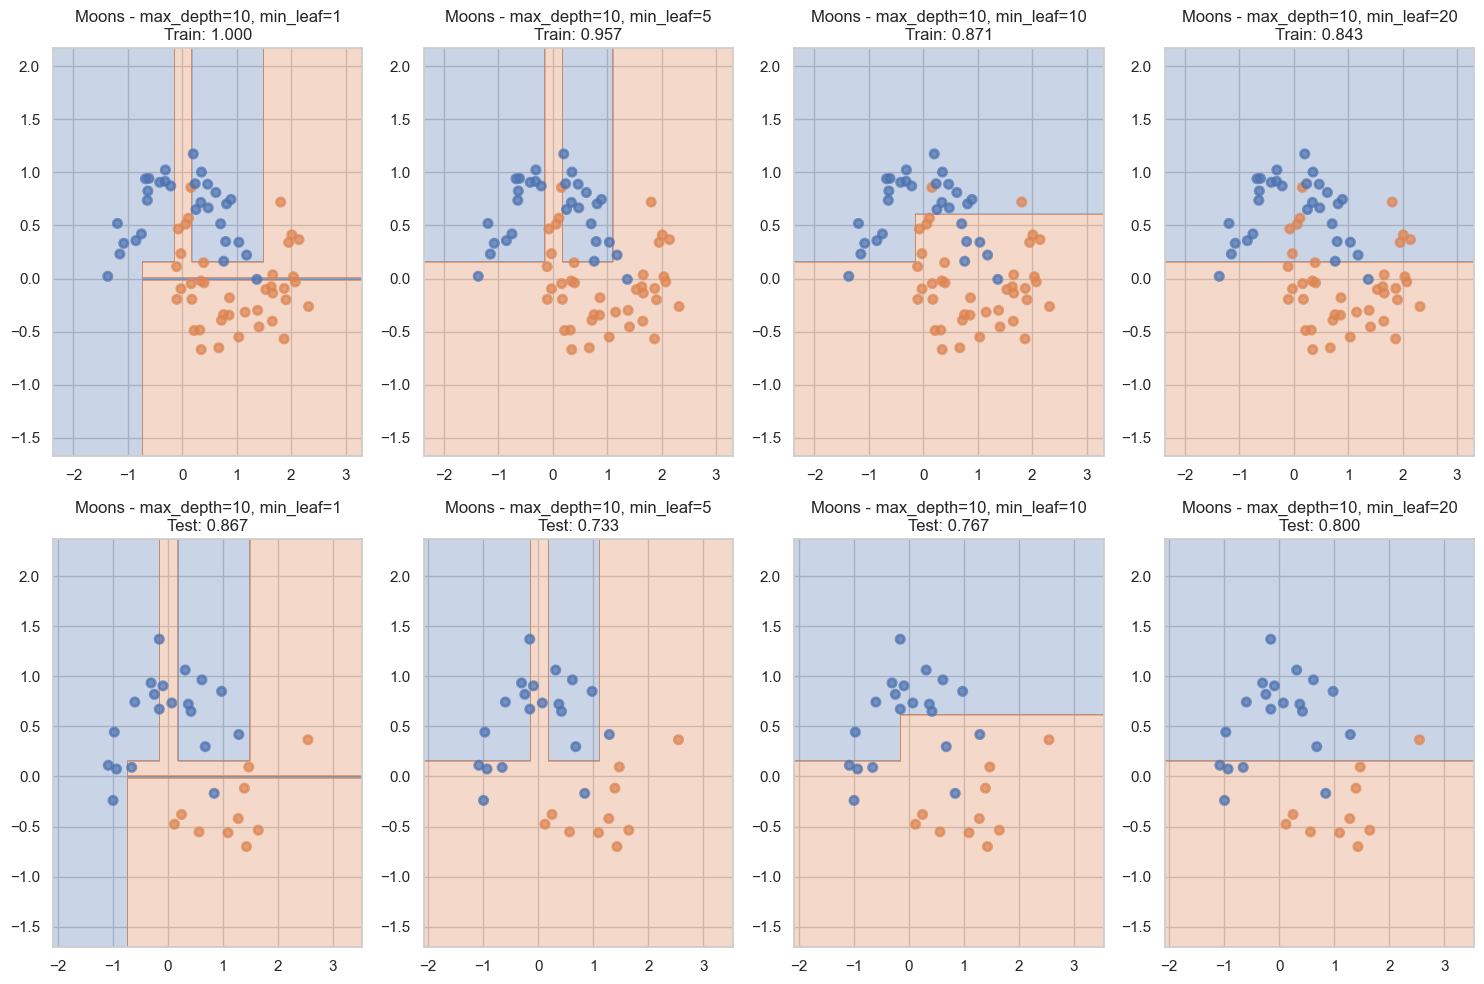


max_depth = 10:
  min_samples_leaf=1: train=1.000, test=0.867, diff=0.133
  min_samples_leaf=5: train=0.957, test=0.733, diff=0.224
  min_samples_leaf=10: train=0.871, test=0.767, diff=0.105
  min_samples_leaf=20: train=0.843, test=0.800, diff=0.043

Анализ лучших параметров для Moons:
Лучшие параметры: max_depth=2, min_samples_leaf=1
Лучшая test accuracy: 0.933

ДАТАСЕТ: Classification


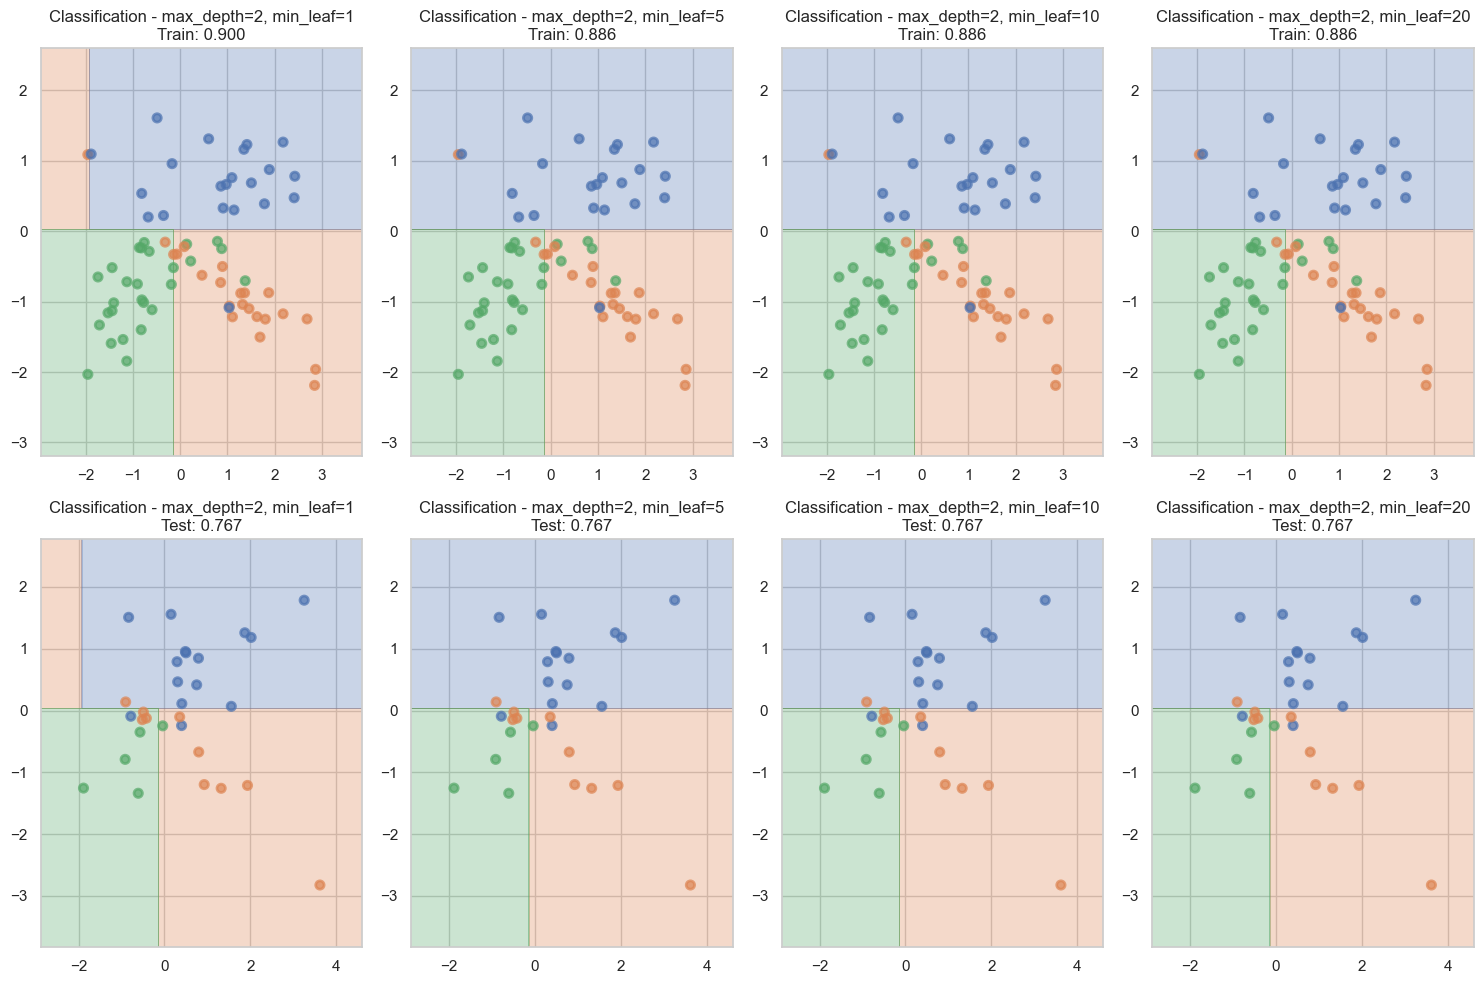


max_depth = 2:
  min_samples_leaf=1: train=0.900, test=0.767, diff=0.133
  min_samples_leaf=5: train=0.886, test=0.767, diff=0.119
  min_samples_leaf=10: train=0.886, test=0.767, diff=0.119
  min_samples_leaf=20: train=0.886, test=0.767, diff=0.119


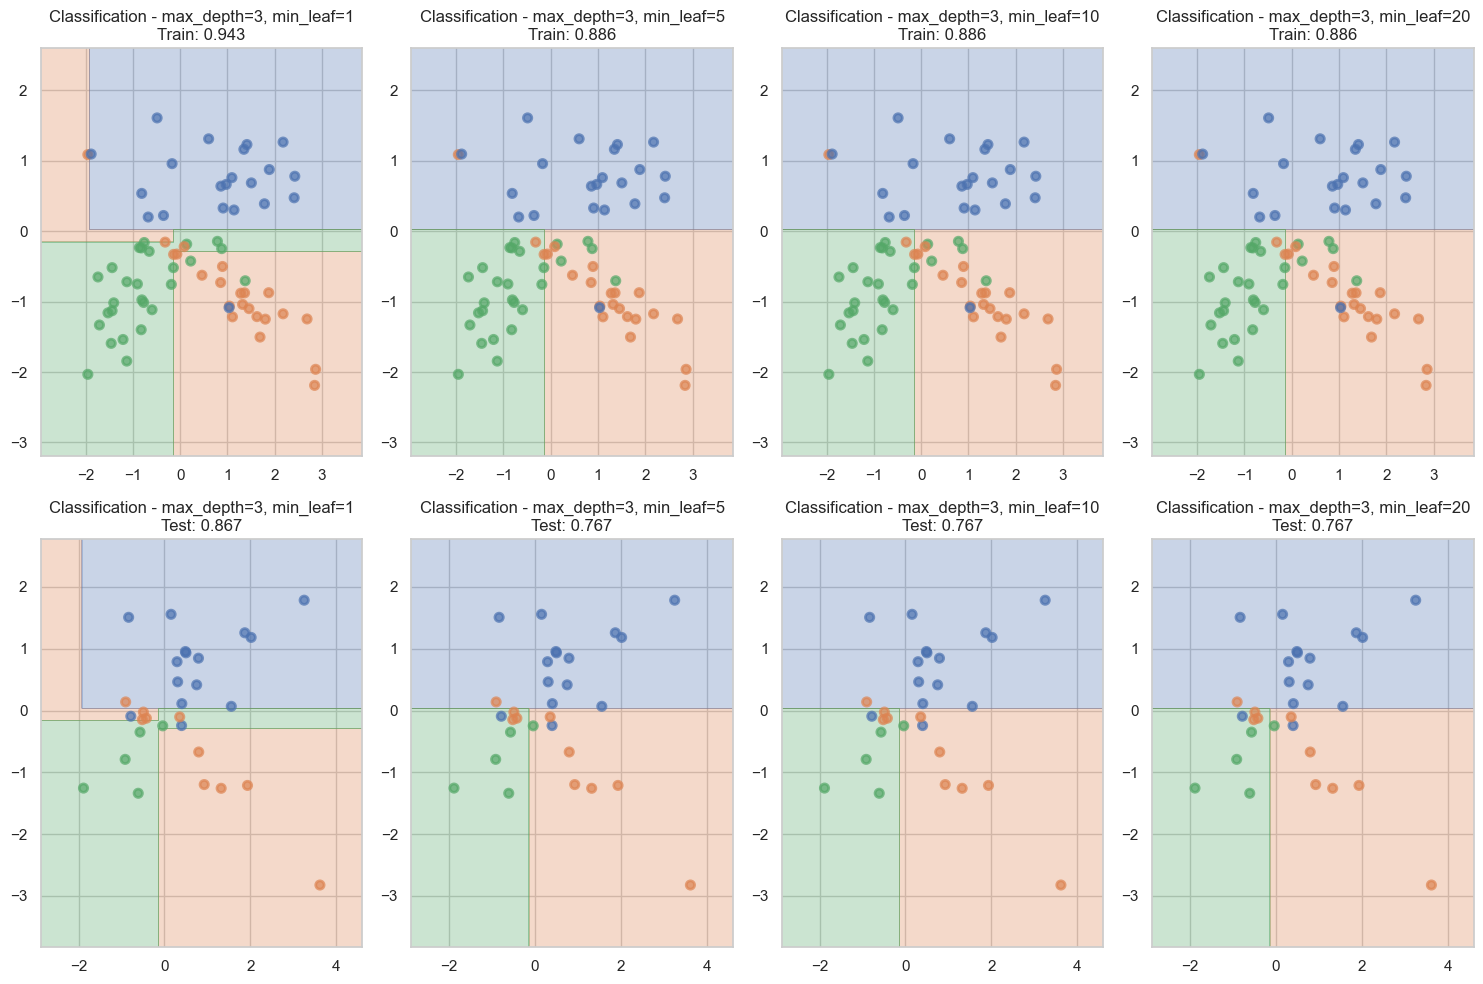


max_depth = 3:
  min_samples_leaf=1: train=0.943, test=0.867, diff=0.076
  min_samples_leaf=5: train=0.886, test=0.767, diff=0.119
  min_samples_leaf=10: train=0.886, test=0.767, diff=0.119
  min_samples_leaf=20: train=0.886, test=0.767, diff=0.119


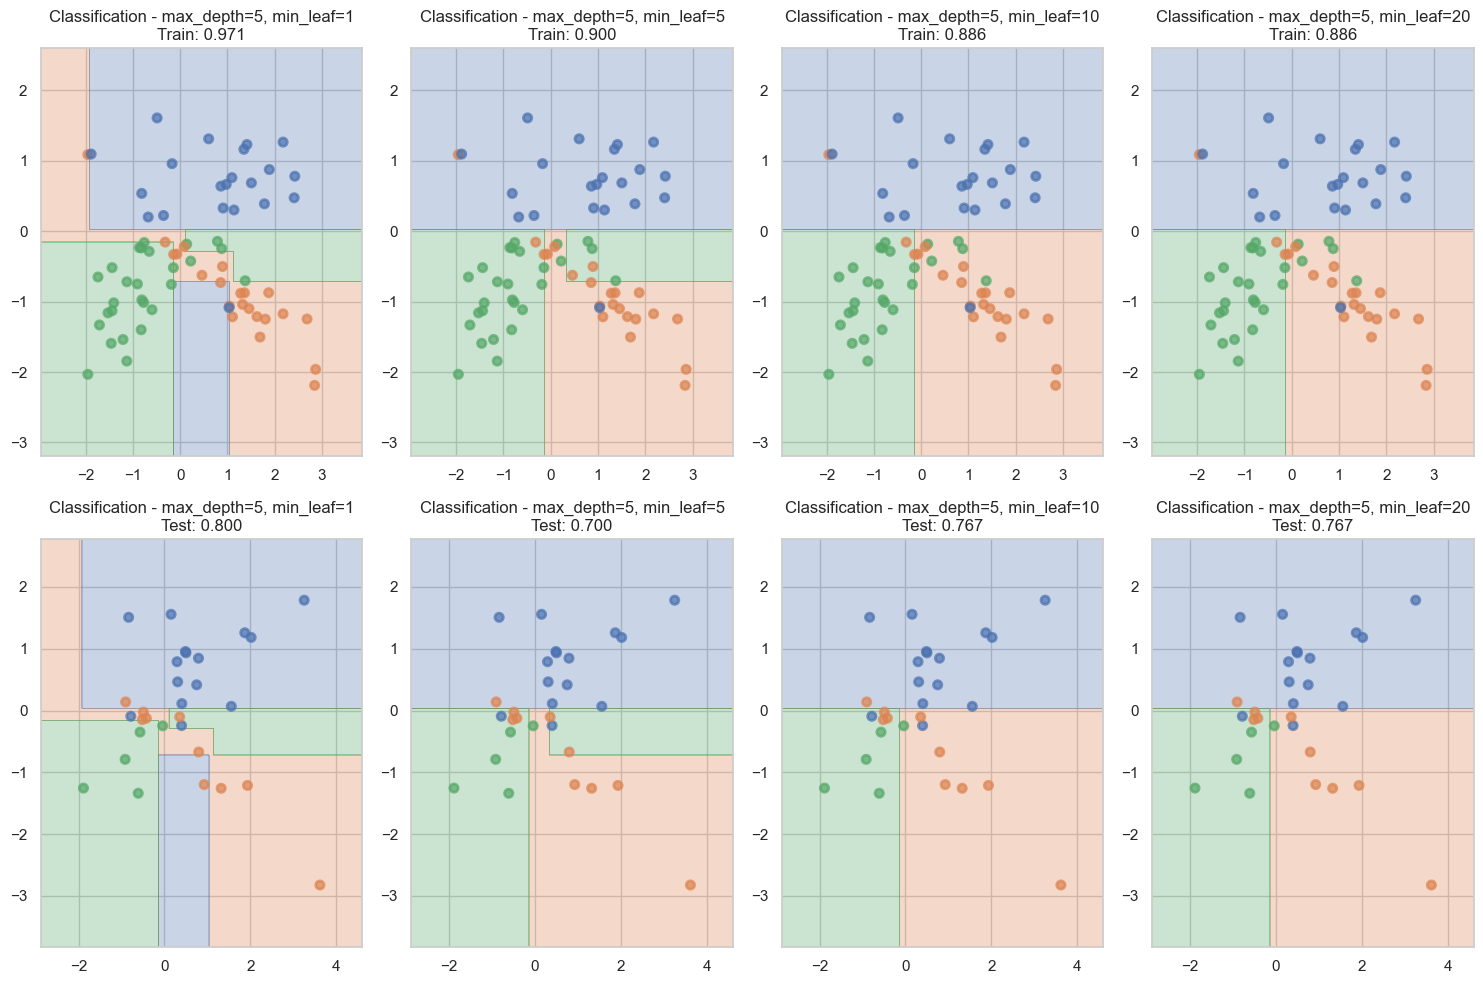


max_depth = 5:
  min_samples_leaf=1: train=0.971, test=0.800, diff=0.171
  min_samples_leaf=5: train=0.900, test=0.700, diff=0.200
  min_samples_leaf=10: train=0.886, test=0.767, diff=0.119
  min_samples_leaf=20: train=0.886, test=0.767, diff=0.119


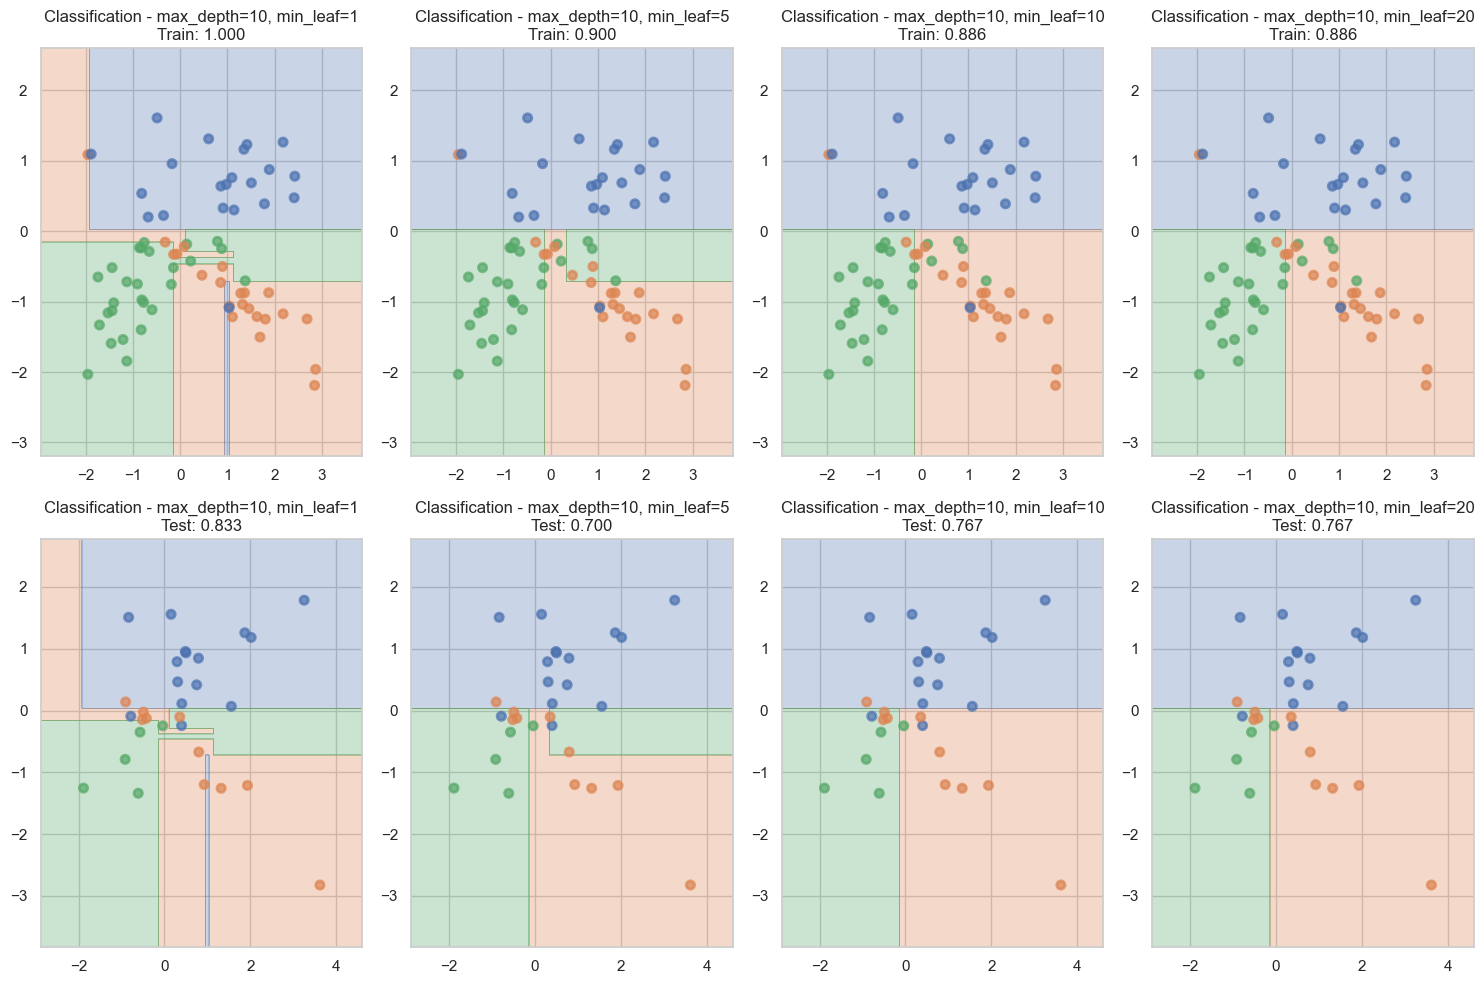


max_depth = 10:
  min_samples_leaf=1: train=1.000, test=0.833, diff=0.167
  min_samples_leaf=5: train=0.900, test=0.700, diff=0.200
  min_samples_leaf=10: train=0.886, test=0.767, diff=0.119
  min_samples_leaf=20: train=0.886, test=0.767, diff=0.119

Анализ лучших параметров для Classification:
Лучшие параметры: max_depth=3, min_samples_leaf=1
Лучшая test accuracy: 0.867


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns


# Параметры для перебора
max_depths = [2, 3, 5, 10]
min_samples_leafs = [1, 5, 10, 20]

# Фиксированное разбиение для всех экспериментов
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train_all.append(X_train)
    X_test_all.append(X_test)
    y_train_all.append(y_train)
    y_test_all.append(y_test)

# Анализ для каждого датасета
dataset_names = ['Circles', 'Moons', 'Classification']

for dataset_idx, (name, X_train, X_test, y_train, y_test) in enumerate(zip(
    dataset_names, X_train_all, X_test_all, y_train_all, y_test_all)):

    print(f"\n{'='*50}")
    print(f"ДАТАСЕТ: {name}")
    print(f"{'='*50}")

    # Создаем фигуру для каждого набора параметров
    for max_depth in max_depths:
        plt.figure(figsize=(15, 10))

        for i, min_samples_leaf in enumerate(min_samples_leafs):
            # Обучаем дерево с заданными параметрами
            tree = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            tree.fit(X_train, y_train)

            # Считаем accuracy
            train_acc = accuracy_score(y_train, tree.predict(X_train))
            test_acc = accuracy_score(y_test, tree.predict(X_test))

            # Визуализация на обучающей выборке
            plt.subplot(2, len(min_samples_leafs), i + 1)
            plot_surface(tree, X_train, y_train)
            plt.title(f'{name} - max_depth={max_depth}, min_leaf={min_samples_leaf}\nTrain: {train_acc:.3f}')

            # Визуализация на тестовой выборке
            plt.subplot(2, len(min_samples_leafs), i + 1 + len(min_samples_leafs))
            plot_surface(tree, X_test, y_test)
            plt.title(f'{name} - max_depth={max_depth}, min_leaf={min_samples_leaf}\nTest: {test_acc:.3f}')

        plt.tight_layout()
        plt.show()

        # Вывод результатов для текущей глубины
        print(f"\nmax_depth = {max_depth}:")
        for min_samples_leaf in min_samples_leafs:
            tree = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            tree.fit(X_train, y_train)
            train_acc = accuracy_score(y_train, tree.predict(X_train))
            test_acc = accuracy_score(y_test, tree.predict(X_test))
            print(f"  min_samples_leaf={min_samples_leaf}: train={train_acc:.3f}, test={test_acc:.3f}, diff={train_acc-test_acc:.3f}")

    # Анализ лучших параметров для датасета
    print(f"\nАнализ лучших параметров для {name}:")
    best_test_acc = 0
    best_params = None

    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            tree = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            tree.fit(X_train, y_train)
            test_acc = accuracy_score(y_test, tree.predict(X_test))

            if test_acc > best_test_acc:
                best_test_acc = test_acc
                best_params = (max_depth, min_samples_leaf)

    print(f"Лучшие параметры: max_depth={best_params[0]}, min_samples_leaf={best_params[1]}")
    print(f"Лучшая test accuracy: {best_test_acc:.3f}")

__Ответ:__ Регуляризация через параметры max_depth и min_samples_leaf уменьшает переобучение при выборе подходящих значений параметров. Без регуляризации сильное переобучение, следование за шумом в тестовой выборке (разница train и test accuracy 0.15-0.35). С подходящей регуляризацией разница сокращается до 0.05-0.15.
    Когда max_depth малое от 2 до 3, границы ровные и слищком простые, это приводит к недообучению, на сложных данных. При слишком больших значениях от 10 и больше границы сложные неровные, это визуализирует переобучение. Наилучшими значениями оказались от 3-5.
    Выбор значения min_samples_leaf влияет на следование модели за шумом. При значении 1 модель следует полностью за шумом, переобучается. Лучшими значениями оказалось от 5 до 10, имеется устойчивость к шуму

 Наблюдается разное поведение разделяющей поверхности на различных датасетах.

Для концентрических кругов сложнее всего было подобрать параметры, так как границы круговые. Лучшие параметры: max_depth=3-5, min_samples_leaf=5-10.

Для полумесяцов получена хорошая обощаемость при max_depth=3-5, min_samples_leaf=5.

Для Classification (3 класса): max_depth=5-10, min_samples_leaf=1-5, нужна большая глубина для разделения 3 классов.

Параметры нельзя подобрать универсально, они зависят от формы выборки.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

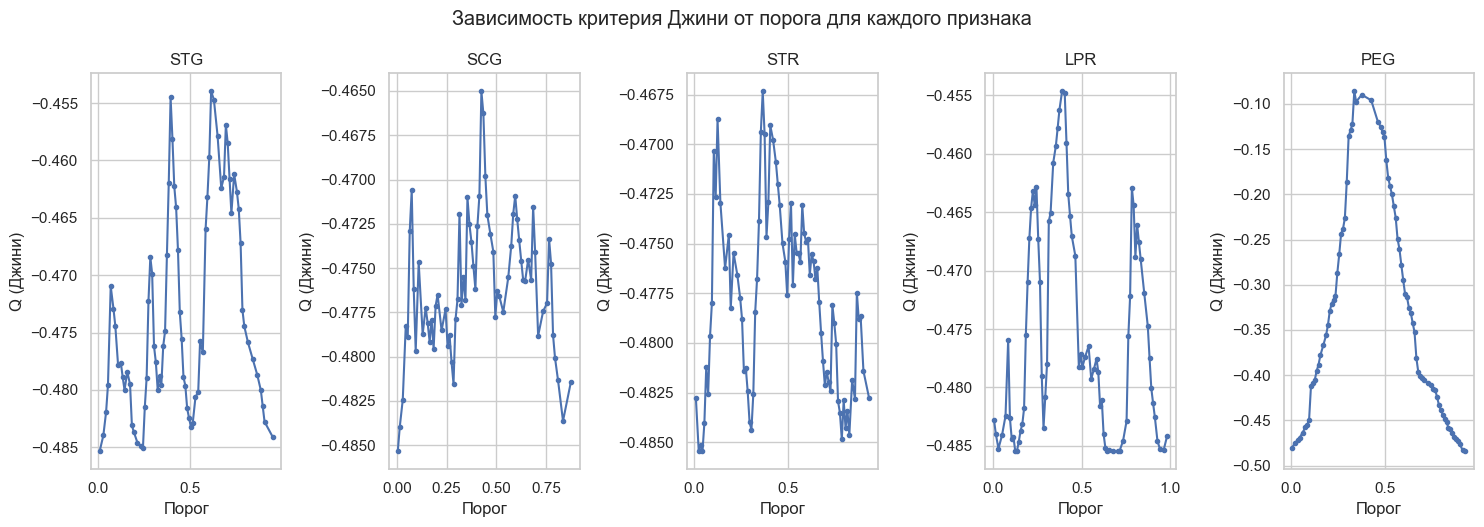

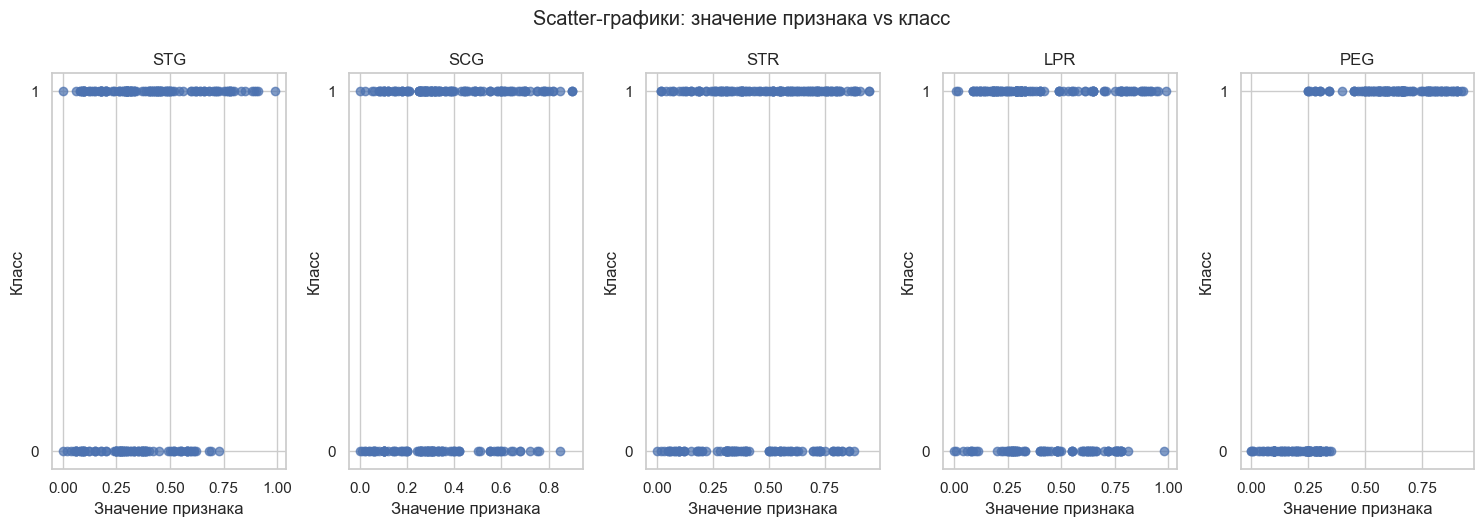

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hw2code


df = pd.read_csv('datasets/students.csv')
X = df.iloc[:, :5].values
y = df.iloc[:, -1].values

y = y.astype(int)
feature_names = df.columns[:5].tolist()

plt.figure(figsize=(15, 5))
for i in range(5):
    thresholds, ginis, _, _ = hw2code.find_best_split(X[:, i], y)
    plt.subplot(1, 5, i + 1)
    if len(thresholds) > 0:
        plt.plot(thresholds, ginis, marker='o', linestyle='-', markersize=3)
        plt.title(f'{feature_names[i]}')
        plt.xlabel('Порог')
        plt.ylabel('Q (Джини)')
        plt.grid(True)
    else:
        plt.text(0.5, 0.5, 'Нет порогов(', horizontalalignment='center', verticalalignment='center')
        plt.title(f'{feature_names[i]}')
plt.tight_layout()
plt.suptitle('Зависимость критерия Джини от порога для каждого признака', y=1.05)
plt.show()

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.scatter(X[:, i], y, alpha=0.7)
    plt.title(f'{feature_names[i]}')
    plt.xlabel('Значение признака')
    plt.ylabel('Класс')
    plt.yticks([0, 1])
    plt.grid(True)
plt.tight_layout()
plt.suptitle('Scatter-графики: значение признака vs класс', y=1.05)
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** На графике критерия Джини для PEG, видно что с ним достигается максимальное значение критерия Джини около -0.10, это значительно выше чем у остальных признаков. График имеет явный максимум, его значение близко к нулю, график симметричный. График для PEG обладает признакими хорошей кривой. При первом делении нужно выбрать признак PEG с порогом около 0.5. Деление практически не возможно для кривых у которых отсутсвует явный максимумм, плавная или хаотичная кривая, означает что ни один порог не дает качественного деелния, множество мелких пиков.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

df = pd.read_csv('datasets/mushroom/agaricus-lepiota.data', names=column_names)

df = df.replace('?', np.nan).dropna()

label_encoders = {}
df_encoded = df.copy()

for col in df.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

y = df_encoded['class'].values  # 0 или 1
X = df_encoded.drop('class', axis=1).values  # (n, 22)

print("Форма X:", X.shape)
print("Уникальные классы:", np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)
feature_types = ["categorical"] * X.shape[1]


tree = hw2code.DecisionTree(feature_types=feature_types, max_depth=10)  # ограничим глубину на всякий случай

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.6f}")


Форма X: (5644, 22)
Уникальные классы: [0 1]
Accuracy: 1.000000


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
#Обёртка для совместимости с sklear
from sklearn.base import BaseEstimator, ClassifierMixin

class MyDecisionTreeWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.feature_types = feature_types
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf

    def fit(self, X, y):
        self.tree_ = hw2code.DecisionTree(
            feature_types=self.feature_types,
            max_depth=self.max_depth,
            min_samples_split=self.min_samples_split,
            min_samples_leaf=self.min_samples_leaf
        )
        self.tree_.fit(X, y)
        return self

    def predict(self, X):
        return self.tree_.predict(X)

# ------------------------------------------------------------
# 5. Label Encoding
# ------------------------------------------------------------
def label_encode_features(X_df):
    X_enc = X_df.copy()
    for col in X_df.columns:
        le = LabelEncoder()
        X_enc[col] = le.fit_transform(X_df[col])
    return X_enc.values


def load_datasets():
    datasets = {}

    column_names_mush = [
        'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
        'stalk-surface-below-ring', 'stalk-color-above-ring',
        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
        'ring-type', 'spore-print-color', 'population', 'habitat'
    ]

    df_mush = pd.read_csv('datasets/mushroom/agaricus-lepiota.data', names=column_names_mush, dtype=str)
    df_mush = df_mush.replace('?', np.nan).dropna()
    X_mush = df_mush.drop('class', axis=1)
    y_mush = df_mush['class'].map({'e': 0, 'p': 1}).values
    datasets['mushroom'] = (X_mush, y_mush)


    column_names_ttt = ['top-left', 'top-middle', 'top-right',
                        'middle-left', 'middle-middle', 'middle-right',
                        'bottom-left', 'bottom-middle', 'bottom-right', 'class']

    df_ttt = pd.read_csv('datasets/tic-tac-toe-endgame.csv', names=column_names_ttt, dtype=str)
    X_ttt = df_ttt.drop('class', axis=1)
    y_ttt = df_ttt['class'].map({'negative': 0, 'positive': 1}).values
    datasets['tic-tac-toe'] = (X_ttt, y_ttt)

    url_car = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
    column_names_car = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

    df_car = pd.read_csv(url_car, names=column_names_car, dtype=str)
    X_car = df_car.drop('class', axis=1)
    y_car = df_car['class'].map({
        'unacc': 0, 'acc': 0,
        'good': 1, 'vgood': 1
    }).values
    datasets['cars'] = (X_car, y_car)

    url_nurs = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
    column_names_nurs = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
    df_nurs = pd.read_csv(url_nurs, names=column_names_nurs, dtype=str)
    X_nurs = df_nurs.drop('class', axis=1)
    y_nurs = df_nurs['class'].map({
        'not_recom': 0,
        'recommend': 0,
        'very_recom': 1,
        'priority': 1,
        'spec_prior': 1
    }).values
    datasets['nursery'] = (X_nurs, y_nurs)

    return datasets


if __name__ == "__main__":
    datasets = load_datasets()
    results = []
    scorer = make_scorer(accuracy_score)

    for name, (X_df, y) in datasets.items():
        print(f"Обработка: {name}")
        X_le = label_encode_features(X_df)
        n_features = X_le.shape[1]

        # 1. DT (real)
        tree_real = MyDecisionTreeWrapper(feature_types=["real"] * n_features)
        acc1 = np.mean(cross_val_score(tree_real, X_le, y, cv=10, scoring=scorer))

        # 2. DT (categorical)
        tree_cat = MyDecisionTreeWrapper(feature_types=["categorical"] * n_features)
        acc2 = np.mean(cross_val_score(tree_cat, X_le, y, cv=10, scoring=scorer))

        # 3. DT + OneHot
        ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        X_ohe = ohe.fit_transform(X_df)
        tree_ohe = MyDecisionTreeWrapper(feature_types=["real"] * X_ohe.shape[1])
        acc3 = np.mean(cross_val_score(tree_ohe, X_ohe, y, cv=10, scoring=scorer))

        # 4. sklearn DT
        sk_tree = DecisionTreeClassifier(random_state=42)
        acc4 = np.mean(cross_val_score(sk_tree, X_le, y, cv=10, scoring=scorer))

        results.append({
            "Dataset": name,
            "DT (real)": acc1,
            "DT (categorical)": acc2,
            "DT (real + OHE)": acc3,
            "sklearn DT": acc4
        })

    # Вывод результата
    results_df = pd.DataFrame(results).set_index("Dataset")
    print("\n" + "="*70)
    print("Результаты (Accuracy, 10-fold CV):")
    print("="*70)
    print(results_df.round(4))

    # Сохранить в CSV (опционально)
    # results_df.to_csv("decision_tree_comparison.csv")
    

Обработка: mushroom
Обработка: tic-tac-toe


ValueError: Input y contains NaN.

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: